#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
# Load your dataset
df = pd.read_csv(r'D:/quetions/archive/Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [2]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [4]:
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 148654
Number of columns: 13


In [5]:
data_types = df.dtypes
print("\nData types of each column:")
print(data_types)


Data types of each column:
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object


In [6]:
 df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

Since 'Notes' and 'Status' are completely empty, i dropping these columns altogether as they may not provide any useful information.

In [7]:
df.drop(['Notes', 'Status'], axis=1, inplace=True)

Imputing with mean/median/mode helps maintain the overall distribution of the data and is a simple way to replace missing values with a representative value.

In [8]:
df['BasePay'].fillna(df['BasePay'].mean(), inplace=True)
df['Benefits'].fillna(df['Benefits'].median(), inplace=True)

In [10]:
df['OvertimePay'].fillna(df['OvertimePay'].mean(), inplace=True)
df['OtherPay'].fillna(df['OtherPay'].median(), inplace=True)

In [11]:
 df.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

In [12]:
selected_columns = ['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay',
                    'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits',
                    'Year','Agency']
selected_df = df[selected_columns]
selected_df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.180000,0.000000,400184.25,28628.62,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.020000,245131.880000,137811.38,28628.62,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.130000,106088.180000,16452.60,28628.62,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.000000,56120.710000,198306.90,28628.62,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.600000,9737.000000,182234.59,28628.62,326373.19,326373.19,2011,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.000000,0.000000,0.00,0.00,0.00,0.00,2014,San Francisco
148650,148651,Not provided,Not provided,66325.448841,5066.059886,811.27,28628.62,0.00,0.00,2014,San Francisco
148651,148652,Not provided,Not provided,66325.448841,5066.059886,811.27,28628.62,0.00,0.00,2014,San Francisco
148652,148653,Not provided,Not provided,66325.448841,5066.059886,811.27,28628.62,0.00,0.00,2014,San Francisco


In [13]:
basic_stats = selected_df.describe()

In [14]:
basic_stats

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000
mean,74327.500000,66325.448841,5066.059886,3648.690945,25888.705945,74768.321972,93692.554811,2012.522643
std,42912.857795,42676.946745,11454.226449,8056.506915,13488.172930,50517.005274,62793.533483,1.117538
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000
25%,37164.250000,33847.017500,0.000000,0.000000,22342.297500,36168.995000,44065.650000,2012.000000
50%,74327.500000,65092.190000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000
75%,111490.750000,94605.740000,4658.667500,4235.907500,33468.980000,105839.135000,132876.450000,2014.000000
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000


In [15]:
mode_values = selected_df.mode().iloc[0]
mode_values

Id                                 1
EmployeeName               Kevin Lee
JobTitle            Transit Operator
BasePay                          0.0
OvertimePay                      0.0
OtherPay                         0.0
Benefits                    28628.62
TotalPay                         0.0
TotalPayBenefits             7959.18
Year                          2014.0
Agency                 San Francisco
Name: 0, dtype: object

In [16]:
salary_range = selected_df['TotalPay'].max() - selected_df['TotalPay'].min()
salary_range

568213.56

In [17]:
std_deviation = selected_df['TotalPay'].std()
std_deviation

50517.005273949944

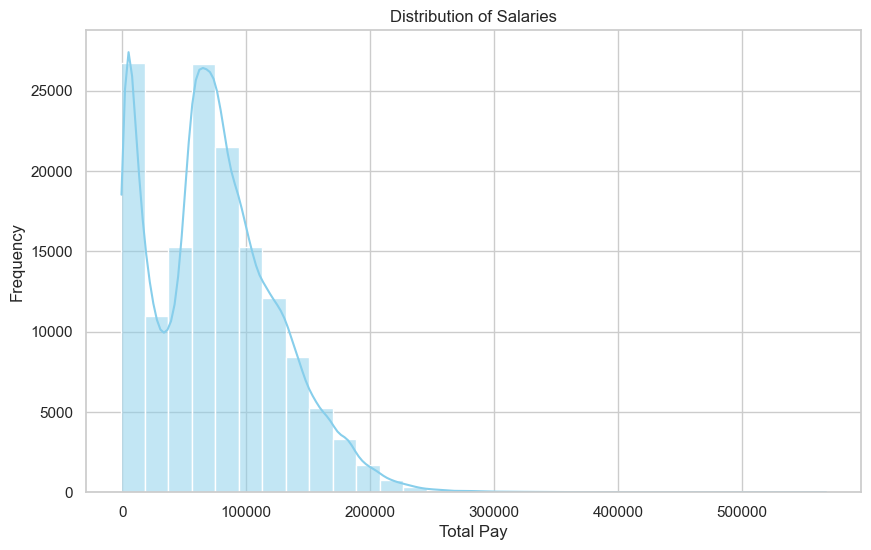

In [20]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalPay'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Salaries')
plt.xlabel('Total Pay')
plt.ylabel('Frequency')
plt.show()

In [29]:
df['Agency'].unique()

array(['San Francisco'], dtype=object)

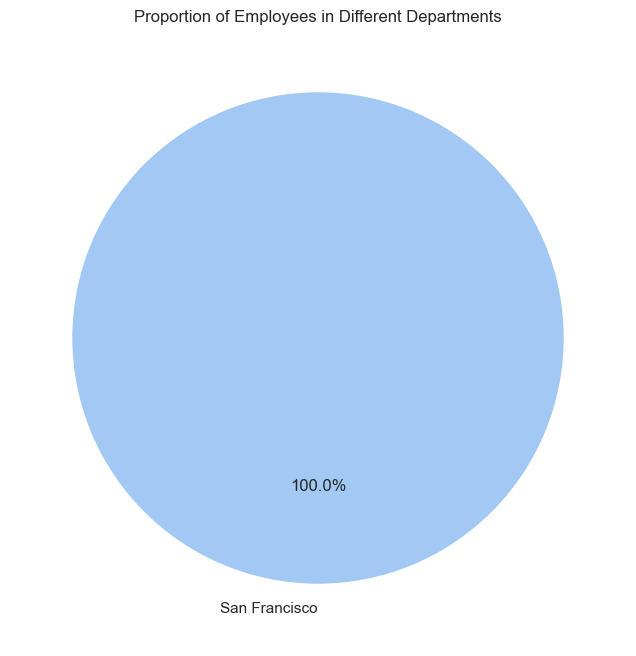

In [21]:
department_counts = df['Agency'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Proportion of Employees in Different Departments')
plt.show()

Group the data by 'JobTitle' and calculate average salaries

In [30]:
grouped_data = df.groupby('JobTitle')['TotalPay'].mean().reset_index()
print("Summary Statistics for Average Salaries by Job Title:")
print(grouped_data)

Summary Statistics for Average Salaries by Job Title:
                                            JobTitle      TotalPay
0                                      ACCOUNT CLERK  44035.664337
1                                         ACCOUNTANT  47429.268000
2                                  ACCOUNTANT INTERN  29031.742917
3                        ACPO,JuvP, Juv Prob (SFERS)  62290.780000
4                                      ACUPUNCTURIST  67594.400000
...                                              ...           ...
2154                           X-RAY LABORATORY AIDE  52705.880385
2155                           X-Ray Laboratory Aide  50823.942700
2156  YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS  53632.870000
2157                              Youth Comm Advisor  41414.307500
2158                                     ZOO CURATOR  66686.560000

[2159 rows x 2 columns]


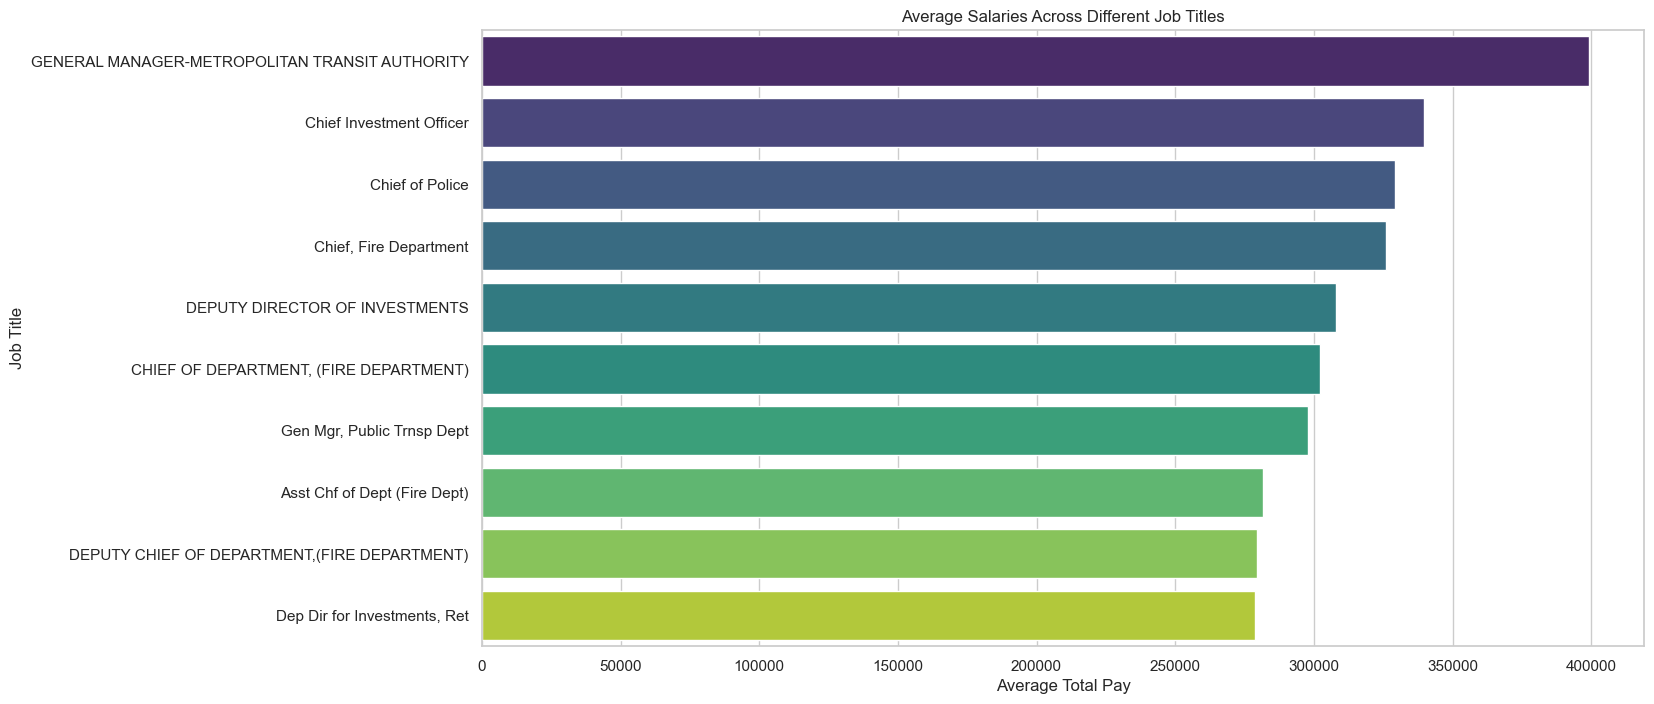

In [31]:
plt.figure(figsize=(15, 8))
sns.barplot(x='TotalPay', y='JobTitle', data=grouped_data.sort_values('TotalPay', ascending=False).head(10), palette='viridis')
plt.title('Average Salaries Across Different Job Titles')
plt.xlabel('Average Total Pay')
plt.ylabel('Job Title')
plt.show()

In [32]:
numerical_columns = ['TotalPay', 'BasePay']
correlation_matrix = df[numerical_columns].corr()

In [33]:
correlation_matrix

,TotalPay,BasePay
TotalPay,1.000000,0.950514
BasePay,0.950514,1.000000


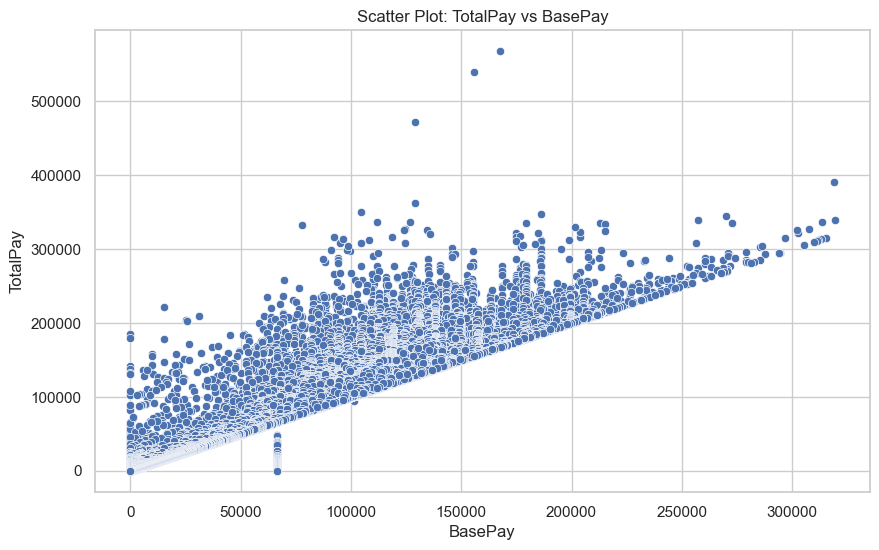

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BasePay', y='TotalPay', data=df)
plt.title('Scatter Plot: TotalPay vs BasePay')
plt.xlabel('BasePay')
plt.ylabel('TotalPay')
plt.show()